# Example 1 - Simple 1d nonlinear function

In this example, we will show how to train a Gaussian Process (GP) surrogate model for a nonlinear function and locate its optimum via Bayesian Optimization. 
The objective function has an analytical form of 
$$ y = (6x-2)^2  sin(12x-4) $$

where x is the independent variable (input parameter) and y is the dependent variable (output response or target). 
The goal is locate the x value where y is optimized (minimized in this case).

The details of this example is summarized in the table below:

| Key Item      | Description |
| :----------------- | :----------------- |
| Goal | Minimization |
| Objective function | Simple nonlinear |
| Input (X) dimension | 1 |
| Output (Y) dimension | 1 |
| Analytical form available? | Yes |
| Acqucision function | Expected improvement (EI) |
| Initial Sampling | Grid search | 

Next, we will go through each step in Bayesian Optimization.


## 1. Import `nextorch` and other packages

In [1]:
import os
import sys
project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_path)

import numpy as np
from nextorch import plotting, bo

## 2. Define the objective function 
We use a Python function object as the objective function `objective_func`. The range of the input `X_ranges` is between 0 and 1, i.e., in a unit scale. 

In [2]:
def simple_1d(X):
    """1D function y = (6x-2)^2 * sin(12x-4)

    Parameters
    ----------
    X : numpy array or a list
        1D independent variable

    Returns
    -------
    y: numpy array
        1D dependent variable
    """
    try:
        X.shape[1]
    except:
        X = np.array(X)
    if len(X.shape)<2:
        X = np.array([X])
        
    y = np.array([],dtype=float)
    
    for i in range(X.shape[0]):
        ynew = (X[i]*6-2)**2*np.sin((X[i]*6-2)*2) 
        y = np.append(y, ynew)
    y = y.reshape(X.shape)
    
    return y

objective_func = simple_1d

## 3. Define the initial sampling plan
The initial sampling plan `X_init` can be a Design of Experiment (DOE), random sampling or grid search. In this example, since the input dimension is only 1, we can just do a grid search for x with a 0.25 interval. 

The initial reponse `Y_init` is computed from the objective function.

In [3]:
# Create a grid with a 0.25 interval
X_init = np.array([[0, 0.25, 0.5, 0.75]]).T

# X_range is [0, 1], therefore we can get the reponse directly  
# from the objective function
# Get the initial responses
Y_init = objective_func(X_init)
# Equavalent to 
# Y_init = bo.eval_objective_func(X_init, X_ranges = [0,1], objective_func)

## 4. Initialize an `Experiment` object 

The `Experiment` object is the core class in `nextorch`. 

It consists of a Gaussian Process (GP) model `Exp.model` trained by the input data and an acquisition function `acq_func` which provides the next point to sample.  


In [4]:
# Initialize an Experiment object Exp
# Set its name, the files will be saved under the folder with the same name
Exp = bo.Experiment('simple_1d') 
# Import the initial data
# Set unit_flag to true since the X is in a unit scale
Exp.input_data(X_init, Y_init, unit_flag = True)
# Set the optimization specifications 
# Here we set the objective function, minimization as the goal
Exp.set_optim_specs(objective_func = objective_func, maximize = False)

Iter 10/100: 3.3208022117614746
Iter 20/100: 3.1972315311431885
Iter 30/100: 3.1579580307006836


## 5. Run trials 
We define one iteration of the experiment as a trial. 

First, the next point(s) `X_new_real` to be run are suggested by the acquisition function. Next, the reponse at this point `Y_new_real` is computed from the objective function. We generate one point per trial in this experiment.

We create a test input set `X_test` to plot the objective function and acquisition function value versus X. This process is repeated until the a stopping criteria is met.

The acquisition function Expected Improvement (EI) balances between exploitation and exploration. Generally, it is a good one to try first. 

Iteration 0, objective function


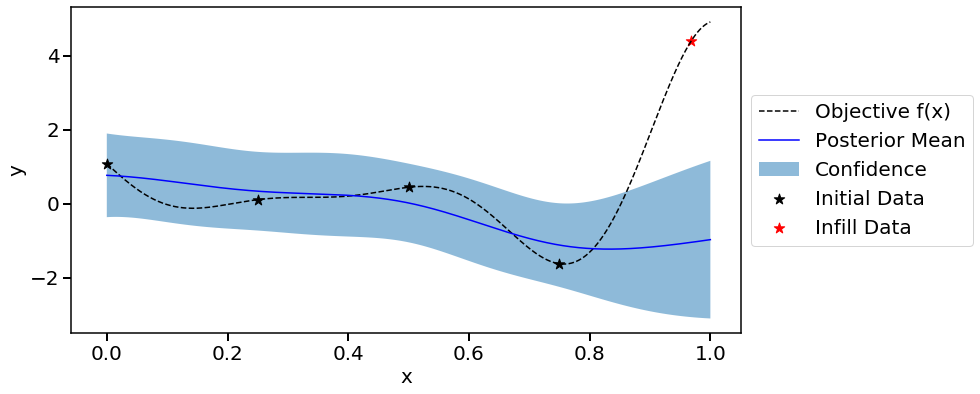

Iteration 0, acquisition function


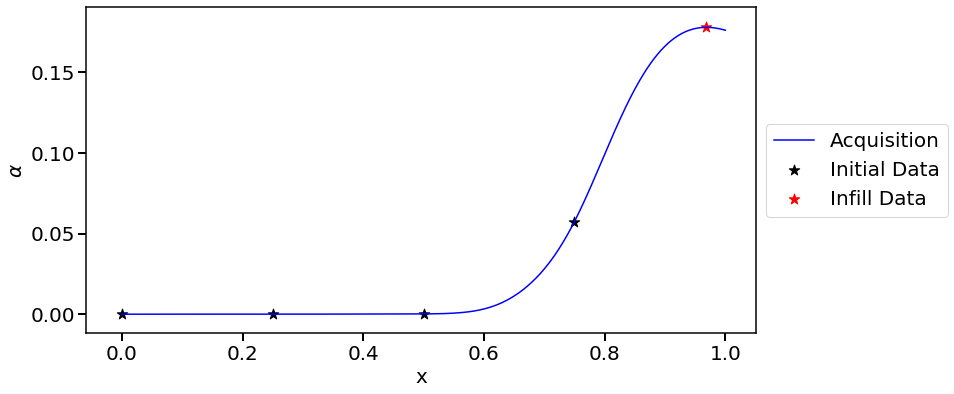

Iter 10/100: 3.773294448852539
Iter 20/100: 3.4931488037109375
Iter 30/100: 3.4234893321990967
Iter 40/100: 3.404020309448242
Iter 50/100: 3.3938231468200684
Iter 60/100: 3.3882808685302734
Iter 70/100: 3.3857948780059814
Iter 80/100: 3.384295701980591
Iter 90/100: 3.3831944465637207
Iter 100/100: 3.3824381828308105
Iteration 1, objective function


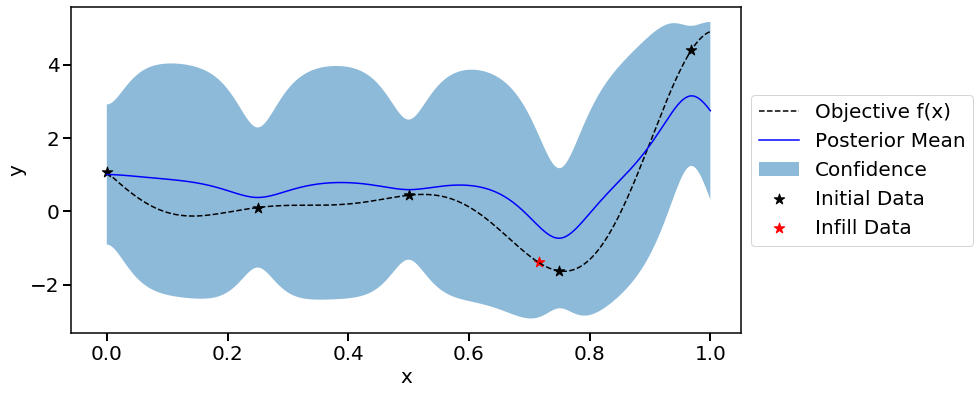

Iteration 1, acquisition function


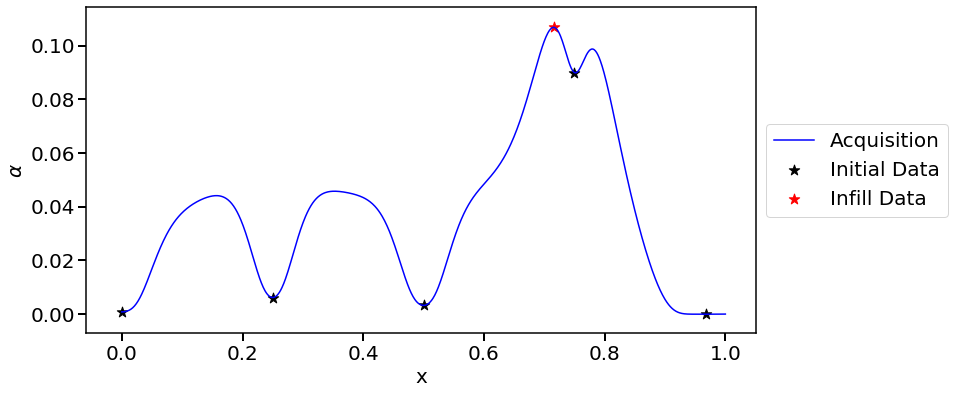

Iter 10/100: 3.0621070861816406
Iter 20/100: 3.0249500274658203
Iter 30/100: 2.972963571548462
Iteration 2, objective function


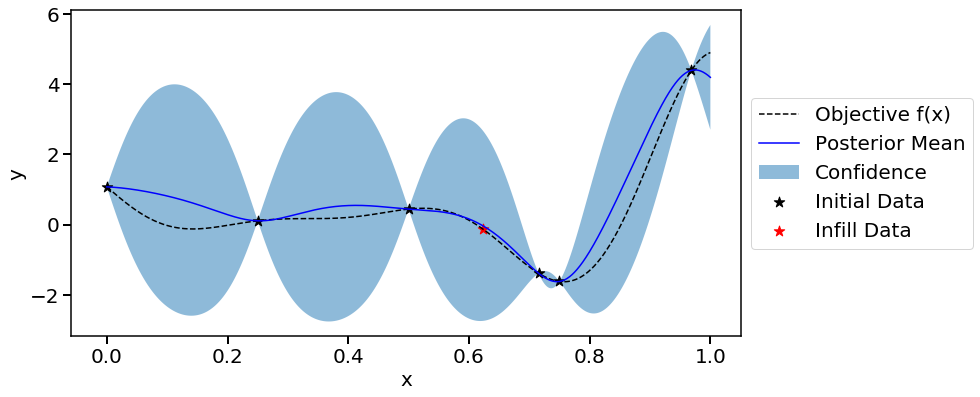

Iteration 2, acquisition function


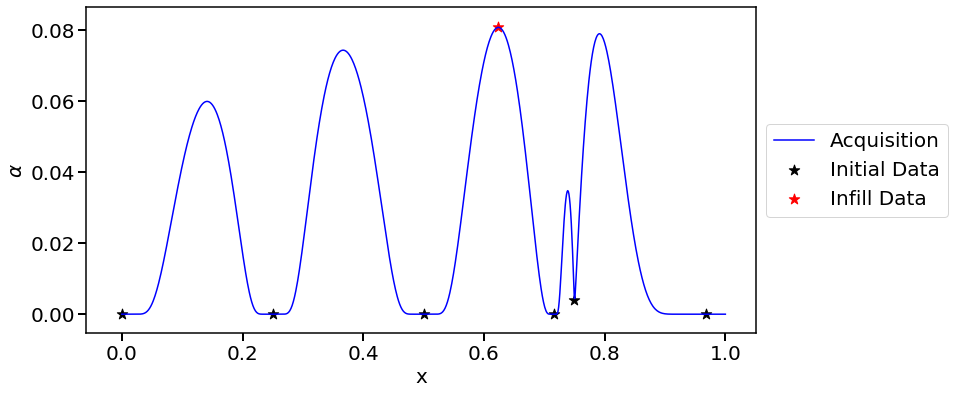

Iteration 3, objective function


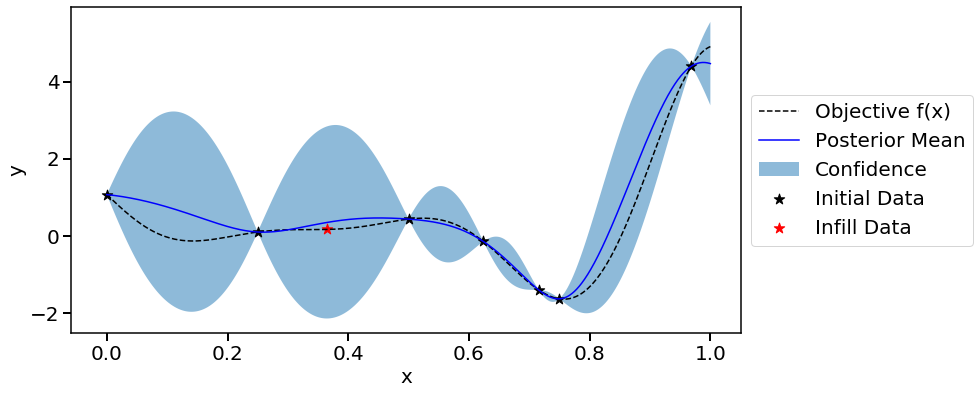

Iteration 3, acquisition function


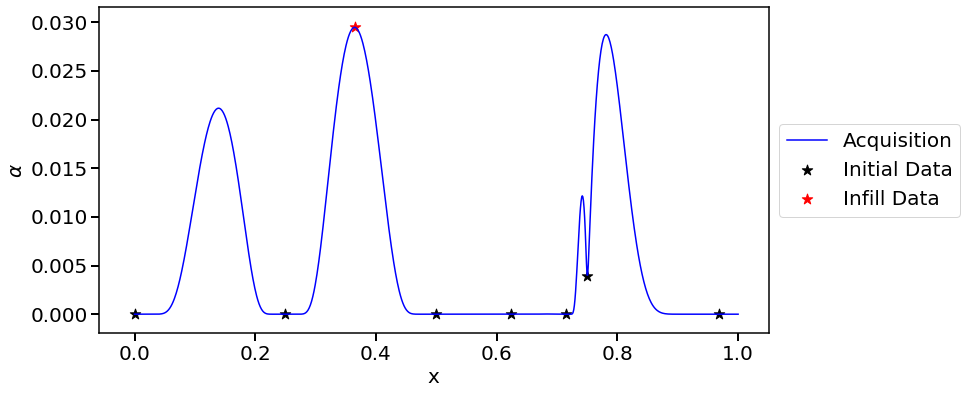

Iteration 4, objective function


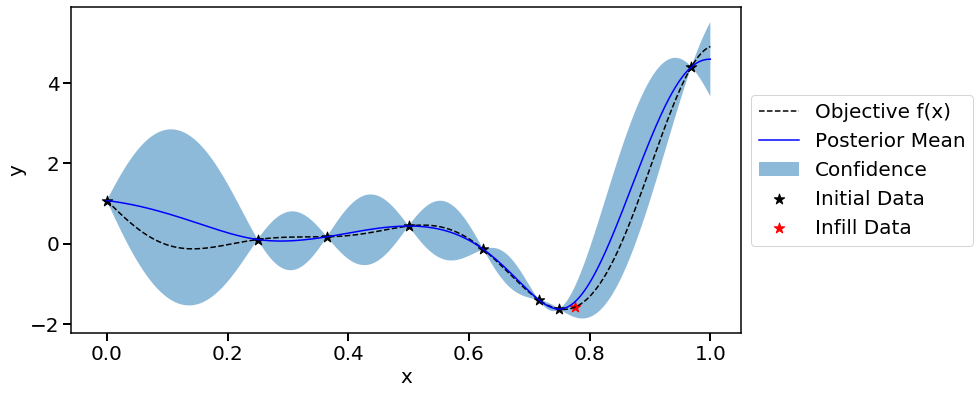

Iteration 4, acquisition function


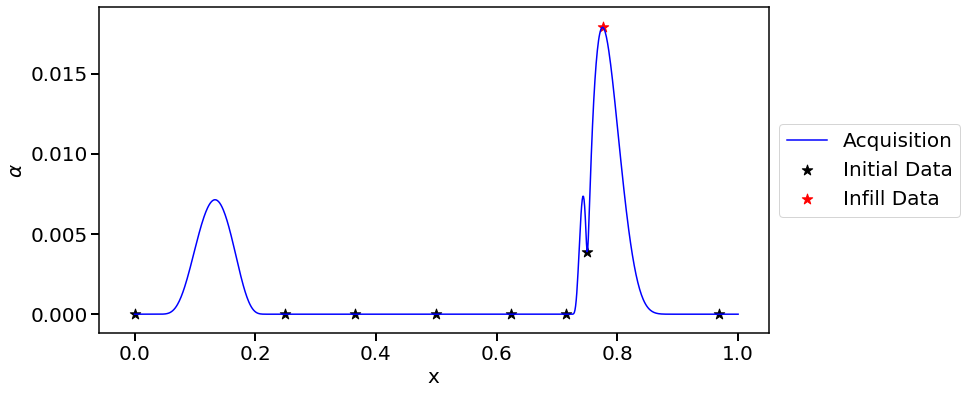

Iter 10/100: 2.1520633697509766
Iter 20/100: 2.1445930004119873
Iter 30/100: 2.1397523880004883
Iter 40/100: 2.1362524032592773
Iter 50/100: 2.1339566707611084
Iter 60/100: 2.132289171218872
Iter 70/100: 2.13106632232666
Iter 80/100: 2.1301424503326416
Iter 90/100: 2.1294119358062744
Iter 100/100: 2.128829002380371
Iteration 5, objective function


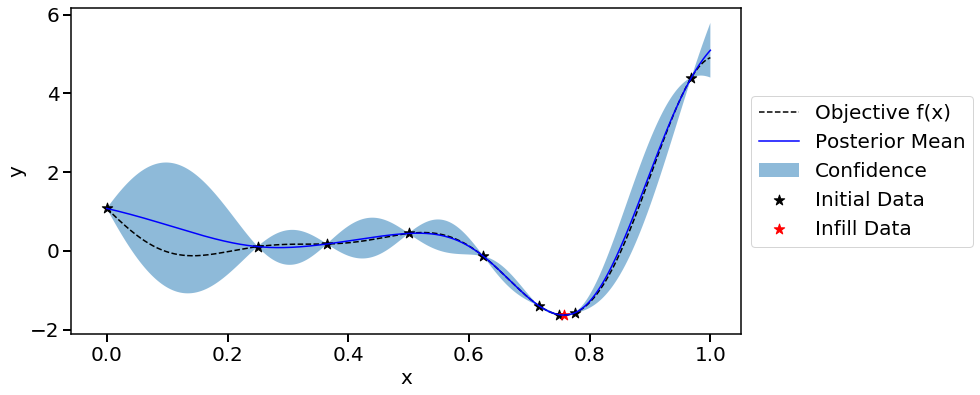

Iteration 5, acquisition function


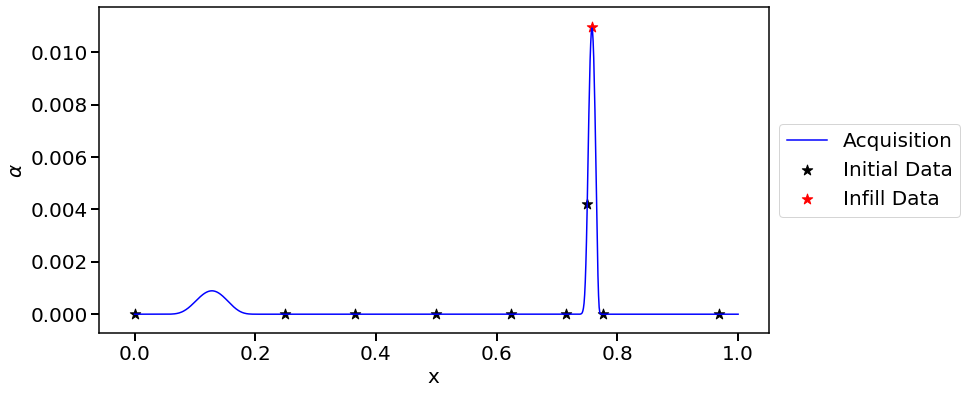

Iter 10/100: 1.5866434574127197
Iteration 6, objective function


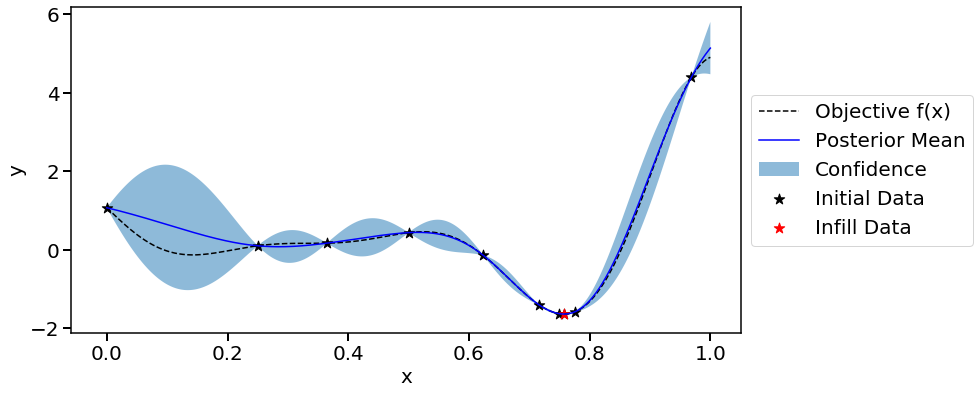

Iteration 6, acquisition function


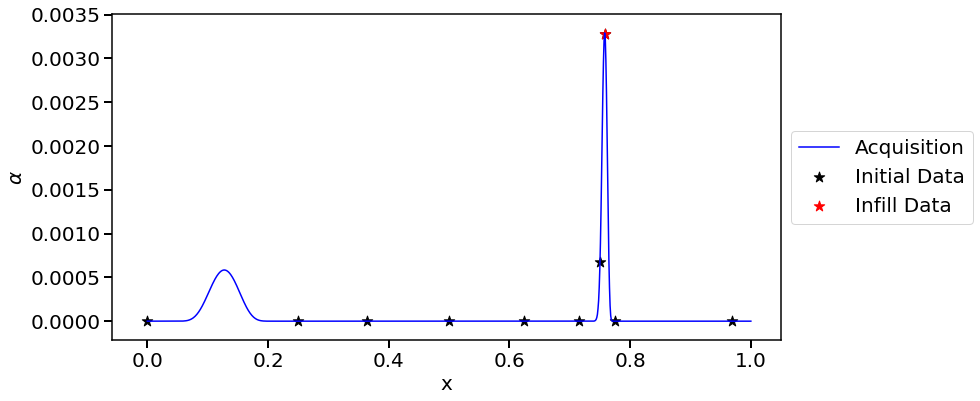

Iteration 7, objective function


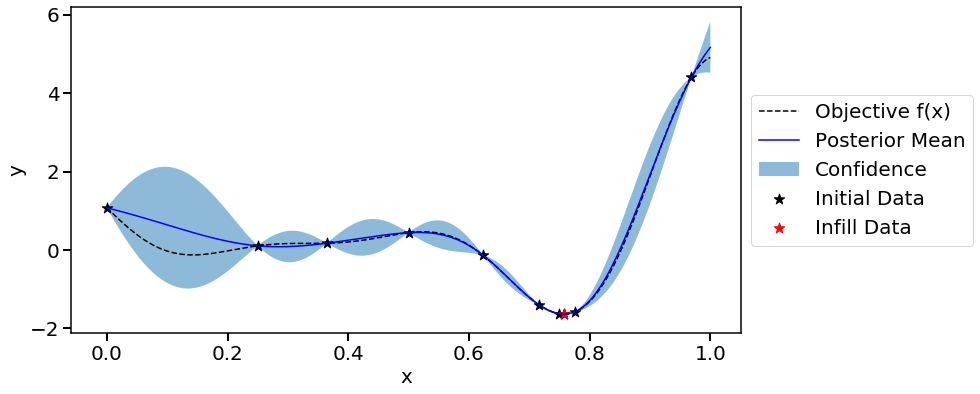

Iteration 7, acquisition function


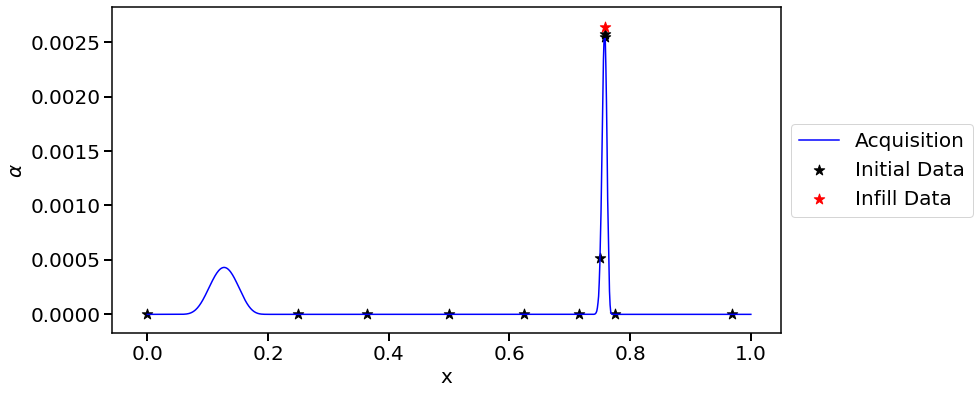

Iteration 8, objective function


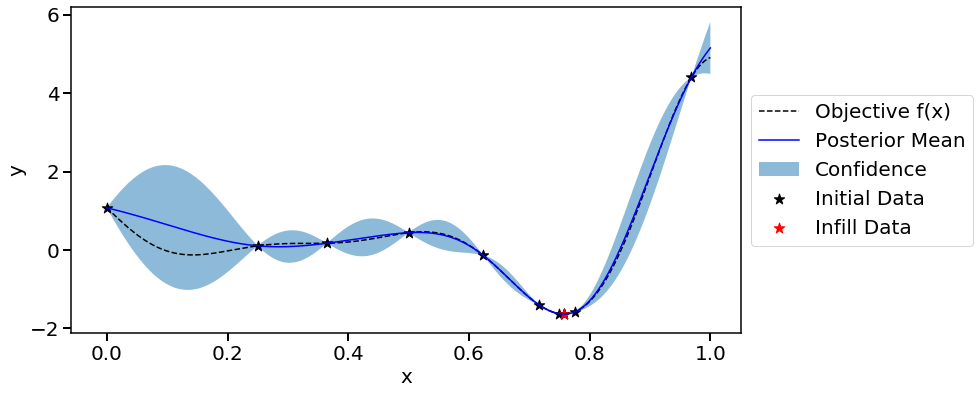

Iteration 8, acquisition function


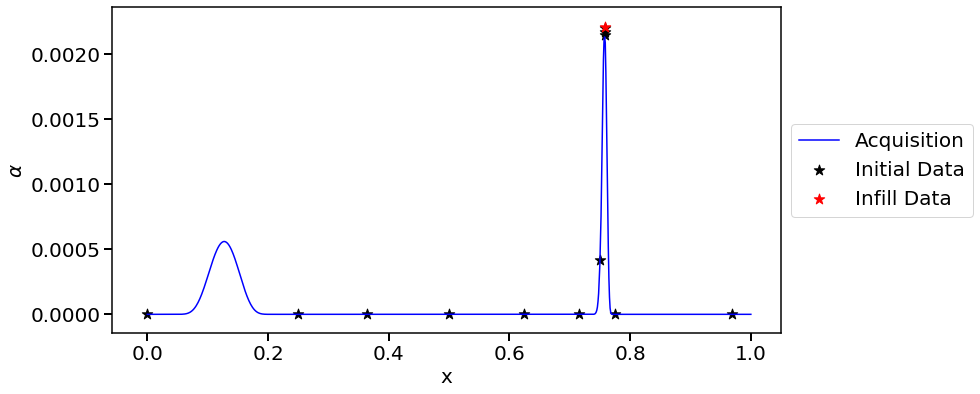

Iteration 9, objective function


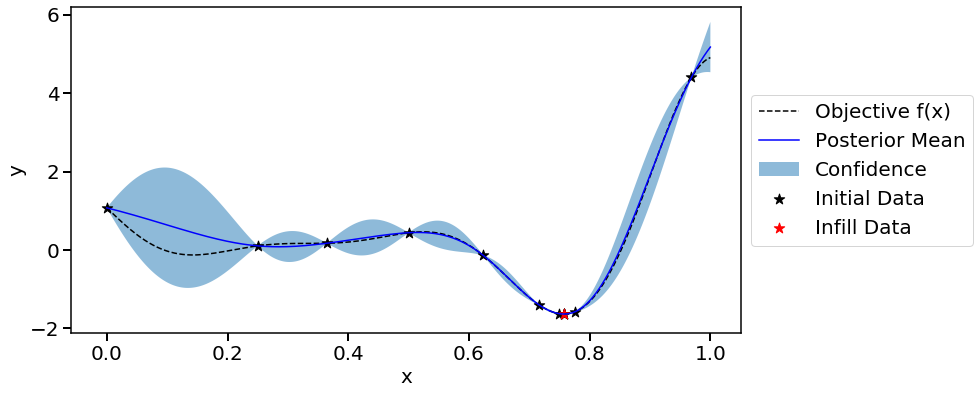

Iteration 9, acquisition function


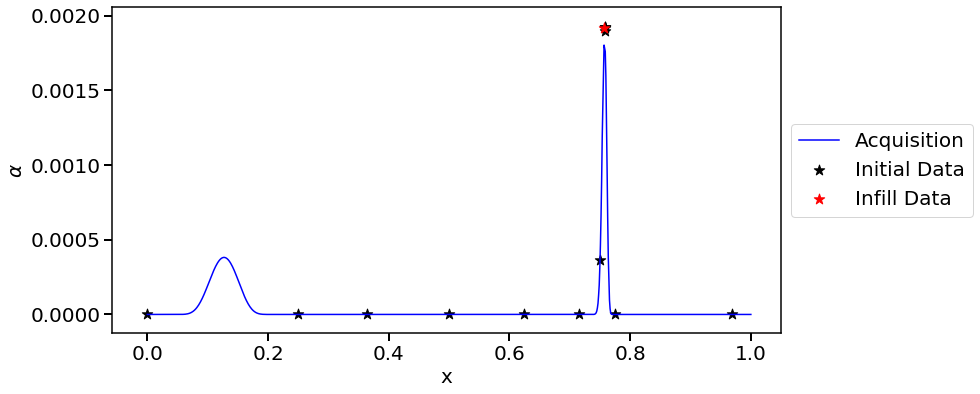

In [5]:
# Create test data points for plotting
X_test = np.linspace(0, 1, 1000)

# Set a flag for saving png figures
save_fig_flag = False

# Set the number of iterations  
n_trials = 10

# Optimization loop
for i in range(n_trials):
    # Generate the next experiment point
    # X_new is in a unit scale
    # X_new_real is in a real scale defined in X_ranges
    # Select EI as the acquisition function 
    X_new, X_new_real, acq_func = Exp.generate_next_point(acq_func_name = 'EI')
    # Get the reponse at this point
    Y_new_real = objective_func(X_new_real)
    
    # Plot the objective functions, and acqucision function
    print('Iteration {}, objective function'.format(i))
    plotting.objective_func_1d_exp(Exp, X_test = X_test, X_new = X_new, plot_real = True, save_fig = save_fig_flag)
    print('Iteration {}, acquisition function'.format(i))
    plotting.acq_func_1d_exp(Exp, X_test = X_test, X_new = X_new, save_fig = save_fig_flag)
    
    # Input X and Y of the next point into Exp object
    # Retrain the model 
    Exp.run_trial(X_new, X_new_real, Y_new_real)


## 6. Validate the final model
We can get the optimum value from the `Experiment` object and validate the GP model predictions on the training data. The parity plots below show that the GP model agrees well with objective function values. 

The best reponse is Y = -6.020740004100358 at X = [0.75725859]


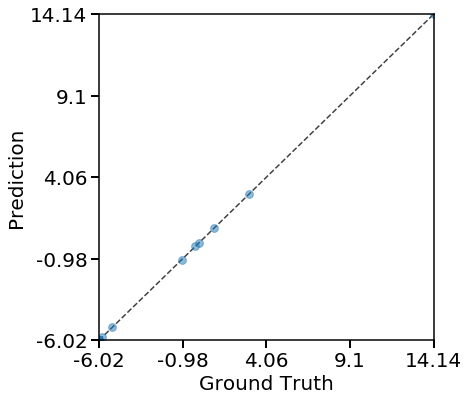

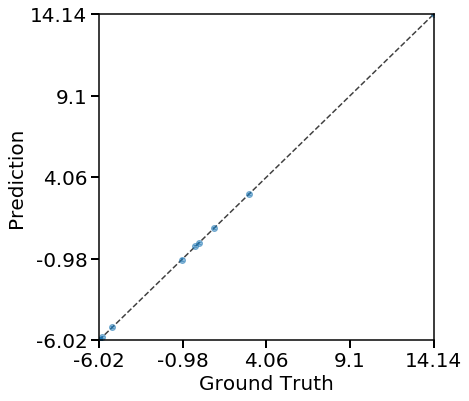

In [10]:
# Obtain the optimum
y_opt, X_opt, index_opt = Exp.get_optim()
print('The best reponse is Y = {} at X = {}'.format(y_opt, X_opt))

# Make a parity plot comparing model predictions versus ground truth values
plotting.parity_exp(Exp, save_fig = save_fig_flag)
# Make a parity plot with the confidence intervals on the predictions
plotting.parity_with_ci_exp(Exp, save_fig = save_fig_flag)